In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('C:\\Users\\karti\\OneDrive\\Desktop\\Analytics work\Spammail.csv')

In [10]:
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [11]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [12]:
df.info

<bound method DataFrame.info of                                                 subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  

In [13]:
df.dtypes

subject    object
message    object
label       int64
dtype: object

In [14]:
df.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [15]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [16]:
df=df.replace(np.nan,"",regex=True)

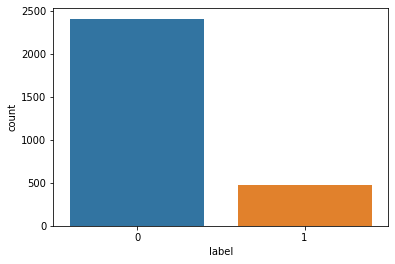

In [17]:
sns.countplot(x=df['label'])

In [19]:
df.drop('email',axis=1,inplace=True)

In [20]:
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


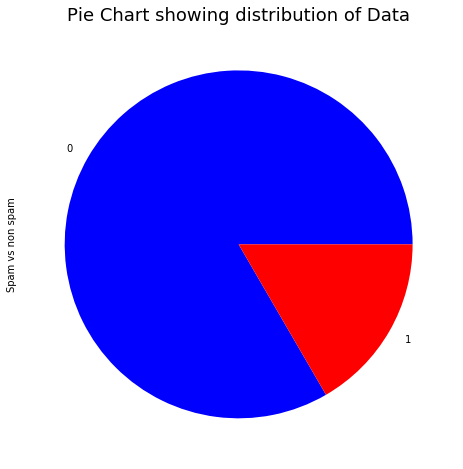

In [64]:
df['label'].value_counts().plot(kind = 'pie', colors = ['blue','red'], figsize = (10, 8))
plt.title('Pie Chart showing distribution of Data', fontsize = 18)
plt.ylabel('Spam vs non spam')
plt.show()

In [57]:
df.groupby('label').describe()

length                                                                
        count         mean          std   min    25%     50%     75%      max
label                                                                        
0      2412.0  3031.518657  3267.716175  17.0  963.0  1977.5  3752.5  28649.0
1       481.0  3654.848233  5154.046225  46.0  547.0  1451.0  4710.0  28571.0

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

Text(0.5, 1.0, 'Most Frequently Occuring Words')

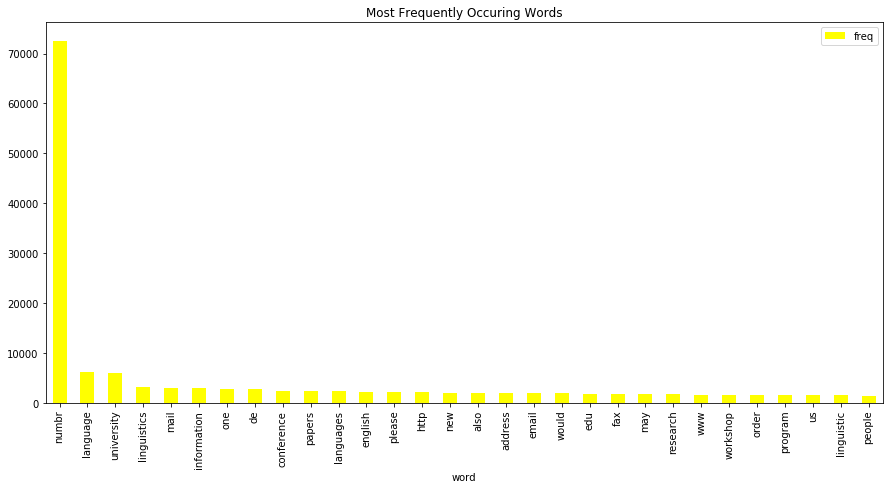

In [65]:
CV= CountVectorizer()
wordcv = CV.fit_transform(df.message)

wordsum = wordcv.sum(axis=0)

freqword = [(word, wordsum[0, i]) for word, i in CV.vocabulary_.items()]
freqwords = sorted(freqword, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(freqwords, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'yellow')
plt.title("Most Frequently Occuring Words")

In [21]:
df['length'] = df.message.str.len()

In [22]:
df.head(4)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324


In [23]:
df['message'] = df['message'].str.lower()

In [24]:
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

In [25]:
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [26]:
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

In [27]:
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [28]:
#Punctuations
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace 
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Removing leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [30]:
!pip install nltk

In [31]:
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
import nltk

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [38]:
#Working on stopwords and removing them to make the data more relevant
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [39]:
df

,subject,message,label,length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856
1,,lang classification grimes joseph e barbara f ...,0,1800
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435
3,risk,colleague researching differing degrees risk p...,0,324
4,request book information,earlier morning phone friend mine living south...,0,1046
...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks stopping taken many new pics made...,1,262
2889,you have been asked to join kiddin,list owner kiddin invited join mailing list li...,1,2163
2890,anglicization of composers ' names,judging return post must sounded like kind sel...,0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha two separate fallacies argument n ary c...,0,2949


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [50]:
nb = MultinomialNB()
LR=LogisticRegression()
DTC=DecisionTreeClassifier()
SV=SVC()

In [45]:
Tfid = TfidfVectorizer()

mes = Tfid.fit_transform(df['message'])

X = mes
y = df['label']

In [48]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

nb.fit(X_train,Y_train)

y_pred= nb.predict(x_test)

print (accuracy_score(y_test,y_pred))

0.8342541436464088


In [51]:
LR.fit(X_train,Y_train)

y_pred= LR.predict(x_test)

print (accuracy_score(y_test,y_pred))

0.9406077348066298


In [54]:
DTC.fit(X_train,Y_train)

y_pred= DTC.predict(x_test)

print (accuracy_score(y_test,y_pred))

0.9475138121546961


In [55]:
SV.fit(X_train,Y_train)

y_pred= SV.predict(x_test)

print (accuracy_score(y_test,y_pred))

0.9696132596685083
